#### Introduction to Importing Data in Python

<b>file = open(filename_var, mode="r")</b> r means to open in read mode. \
<b>text_var = filename_var.read()</b> Reads text in file and saves it to text_var variable. Make sure to close the file when done with file.close() \
<b>with open("file_name.txt", 'r') as file:</b> Now you do not have to close the file. \
<b>vaar = np.loadtext(filename, delimiter=',', skiprow=1, usecols=[0, 2], dtype=str)</b>Default delimiter is any whitespace, use skiprow when for example you only have ints in dataset but first row is a header and we want to ignore it. usecols only loads text from columns 0-2. dtype=str will assure all data entries are imported as strings \
<b>data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)</b>Used if there are diff dtypes for diff columns. np.genfromtxt() with dtype=None argument handles this. Names tells us there is a header \
<b>d = np.recfromcsv(file)</b> Same as np.genfromtxt except delimiter=',', names=True and dtype=None are default. \

In [ ]:
# Open a file: file
file = open("moby_dick.txt", "r")
 
# Print it
print(file.read())
 
# Check whether file is closed
print(file.closed)
 
# Close file
file.close()
 
# Check whether file is closed
print(file.closed)

In [ ]:
# Read & print the first 3 lines
with open('moby_dick.txt') as file:
   print(file.readline())
   print(file.readline())
   print(file.readline())

In [ ]:
# Import numpy
import numpy as np
 
# Assign the filename: file
file = 'digits_header.txt'
 
# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,3])
 
# Print data
print(data)

In [ ]:
# Assign filename: file
file = 'seaslug.txt'
 
# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)
 
# Print the first element of data
print(data[0])
 
# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter="\t", dtype=float, skiprows=1)
 
# Print the 10th element of data_float
print(data_float[9])
 
# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
 
# Assign filename: file
file = 'titanic_corrupt.txt'
 
# Import file: data
# sep (the pandas version of delim),
data = pd.read_csv(file, sep="\t", comment="#", na_values="Nothing")
 
# Print the head of the DataFrame
print(data.head())
 
# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

#### Introduction to other file types
<b>with open("filename.pkl", "rb") as file</b> rb is read binary since pickle files are converted to binary. Use pickle.load(file) to read data. \
<b>data_var = pd.ExcelFile(file)</b> To import excel sheet \
<b>print(data_var.sheet_names)</b> To see names of sheet in excel file \
<b>df1 = data.parse("sheet_name1")</b> Loads sheet named sheet_name1 as a dataframe. \

In [ ]:
# Import pickle package
import pickle
 
# Open pickle file and load data: d
with open('data.pkl', "rb") as file:
   d = pickle.load(file)
 
# Print d
print(d)
 
# Print datatype of d
print(type(d))

In [ ]:
# Import pandas
import pandas as pd
 
# Assign spreadsheet filename: file
file = "battledeath.xlsx"
 
# Load spreadsheet: xls
xls = pd.ExcelFile(file)
 
# Print sheet names
print(xls.sheet_names)

In [ ]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse("2004")
 
# Print the head of the DataFrame df1
print(df1.head())
 
# Load the sheet 2002 into the DataFrame df2 using its index (0).
df2 = xls.parse(0)
 
# Print the head of the DataFrame df2
print(df2.head())

In [ ]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=["Country", "AAM due to War (2002)"])
 
# Print the head of the DataFrame df1
print(df1.head())
 
# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=1, names=["Country"])
 
# Print the head of the DataFrame df2
print(df2.head())

#### Working with Relational Databases in Python
<b>Querying:</b> getting data out from the database \
<b>from sqlalchemy import create_engine</b> Need this method to connected to a relational database \
<b>var = create_engine("sqlite:///DB_name.sqlite")</b> Create SQL engine that will communicate our queries to the database \
<b>con = engine.connect()</b> connect to the engine \ 
<b>table_names = engine.table_names()</b> Use print() to show all tables in the DB \
<b>SELECT * FROM Table_Name</b> Returns all columns of all rows of the table "Table_Name" \
<b>var = con.execute("SELECT * FROM Table_Name")</b> Python code to execute above sequel code \
<b>df = pd.DataFrame(var.fetchall())</b> Convert results object var and save to pandas DataFrame \
<b>df = pd.DataFrame(var.fetchmany(size=5))</b> Fetches five rows instead of all rows
<b>con.close()</b> Close the connection \
<b>df.columns = rs.keys()</b> Use if column names are displayed wrong \
<b>with engine.connect() as con:</b> Dont have to close connection now, good practice \
<b>df = pd.read_sql_query("SELECT * FROM Table_Names", engine)</b> First argument is the query you want to make and second is the engine you want to connect to \
<b>("SELECT col1_table1, col3_table2 FROM table1 INNER JOIN table2 on table1.col2 = table2.col1")</b> Do inner join on columns table1.col2 and table2.col1 and output col1_table1 from table 1 and col3_table2 from table 2.  



In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query that selects ALL columns from the Album table : rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())


In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeID >= 6")
    df = pd.DataFrame(rs.fetchall())
    # Set the DataFrame's column names to the 
    # corresponding names of the table columns.
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    # Selects all records from the Employee table and
    # orders them in increasing order by the column BirthDate
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate", engine)

# Print head of DataFrame
print(df.head())

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())


In [ ]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000", engine)

# Print head of DataFrame
print(df.head())

#### Importing Data from the Internet
<b>from urllib.request import urlretrieve</b> 
<b>urlretrieve(url_var, "filename.csv")</b> Get data from url_var and save it into a file name filename.csv \
<b>import requests</b>
<b>r = requests.get(url_var)</b> Send a get request to given url and catch the response \
<b>text = r.text</b> Returns HTML as a string \ 
<b>soup = BeautifulSoup(html_doc)</b> Create beautiful soup object from the resulting HTML \
<b>print(soup.prettify())</b> Make the HTML look "pretty" \
<b>soup.title, soup.get_text(), for link in soup.find_all('a'):</b> Different methods avaliable \


In [1]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, "winequality-red.csv")

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

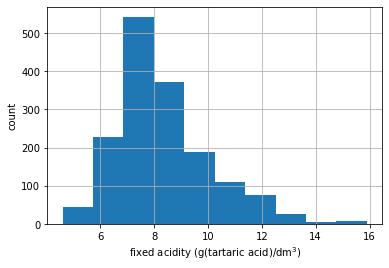

In [2]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=";")

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


In [ ]:
# Manually send and catch the get request and response 
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

In [ ]:
# Use method to do above code
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all("a")

# Print the URLs to the shell
for link in a_tags:
    print(link.get("href"))

#### Interacting with APIs to import data from the web
<b>with open("name.json", "r") as json_file:</b> Open json file located in local directory \
<b>var = json.load(json_file)</b> Load json file. Will be Imported as a dict \
<b>for key, value in var.items():</b> Iterate over the key/value pairs inside the dict \ 
<b>json_data = r.json()</b> r is defined using request.get(url) method. Returns dict \



In [ ]:
# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

In [ ]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])
